In [1]:
# Question 1

import pandas as pd

# Load the dataset
file_path = '/content/sample_data/creditcard.csv'
credit_card_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its shape
credit_card_data.head(), credit_card_data.shape


(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

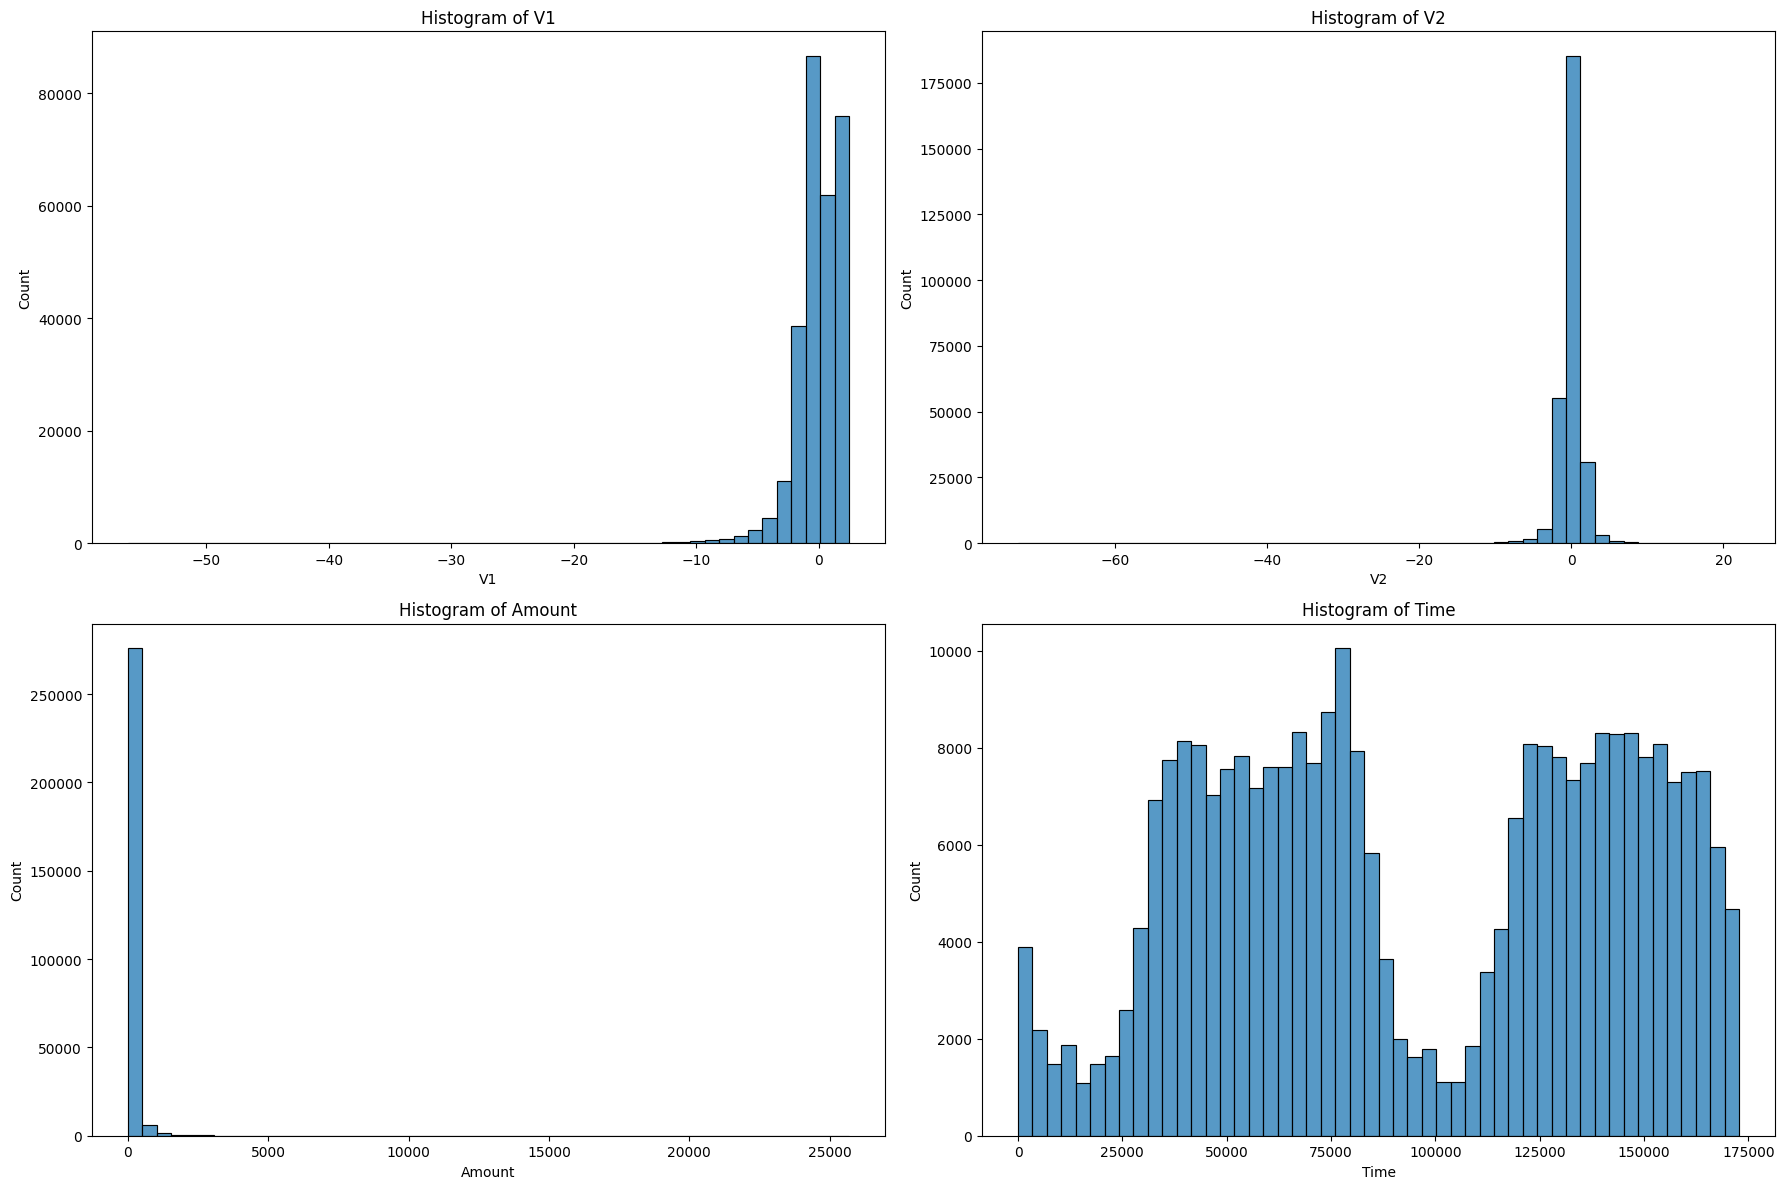

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 Time      float64
 V1        float64
 V2        float64
 V3        float64
 V4        float64
 V5        float64
 V6        float64
 V7        float64
 V8        float64
 V9        float64
 V10       float64
 V11       float64
 V12       float64
 V13       float64
 V14       float64
 V15       float64
 V16       float64
 V17       float64
 V18       float64
 V19       float64
 V20       float64
 V21       float64
 V22       float64
 V23       float64
 V24       float64
 V25       float64
 V26       float64
 V27       float64
 V28       float64
 Amount    float64
 Class      

In [2]:
# Question 1

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values and data types
missing_values = credit_card_data.isnull().sum()
data_types = credit_card_data.dtypes

# Plot histograms for a subset of the features (V1, V2, Amount, Time)
plt.figure(figsize=(18, 12))
for i, feature in enumerate(['V1', 'V2', 'Amount', 'Time'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(credit_card_data[feature], bins=50, kde=False)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

missing_values, data_types


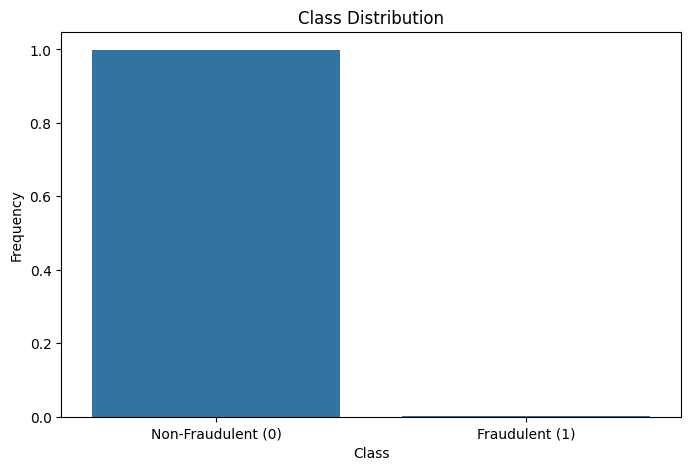

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [3]:
# Question 2

# Calculate and display the class distribution
class_distribution = credit_card_data['Class'].value_counts(normalize=True)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=class_distribution.index, labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

class_distribution

**Question 2**

The dataset is highly imbalanced, with about 99.83% of transactions being non-fraudulent (Class 0) and only about 0.17% being fraudulent (Class 1).

The **Area Under the Precision-Recall Curve (AUC-PR)** is an excellent choice for evaluating models in situations with significant class imbalance, such as fraud detection in credit card transactions. The AUC-PR metric summarizes the precision-recall curve into a single value, providing an aggregate measure of the model's performance across all classification thresholds.

**Justification**
1. **Focus on the Minority Class:** AUC-PR emphasizes the performance on the minority class (fraudulent transactions in this case). It is unaffected by the large number of true negatives, which is particularly important in imbalanced datasets where the overwhelming number of true negatives can distort the performance metrics.

2. **Precision and Recall Trade-off:** This metric considers both precision and recall, which are crucial for fraud detection:
   - **Precision (Positive Predictive Value)** measures the accuracy of the positive predictions, indicating the proportion of identified frauds that are actual frauds. High precision reduces the cost of false alarms, which is vital for maintaining customer trust and satisfaction.
   - **Recall (Sensitivity)** measures the model’s ability to detect all relevant instances of fraud. High recall is essential because failing to detect a fraudulent transaction can lead to significant financial loss.

3. **Comprehensive Evaluation:** By calculating the area under the curve, AUC-PR provides a single measure of overall effectiveness that takes into account all possible thresholds, not just any single operating point. This makes it easier to compare different models’ overall effectiveness in handling class imbalance.

In [4]:
# Question 3

from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Standardize 'Time' and 'Amount'
credit_card_data['NormalizedTime'] = scaler.fit_transform(credit_card_data[['Time']])
credit_card_data['NormalizedAmount'] = scaler.fit_transform(credit_card_data[['Amount']])

# Drop original 'Time' and 'Amount' columns
processed_data = credit_card_data.drop(['Time', 'Amount'], axis=1)

# Show the first few rows of the updated dataset to verify changes
processed_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedTime,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


**Question 3**

Given the presence of `Time` and `Amount` features with differing scales and distributions:
- **Standardization** is preferred because it can handle the outliers and skewed distribution of `Amount` effectively. It will also standardize the `Time` feature, which likely spans a wide range due to its cumulative nature over each transaction.

 We have standardized the `Time` and `Amount` features, and the resulting scaled features are named `NormalizedTime` and `NormalizedAmount`. The processed dataset now consists of the principal component features (V1 to V28), the class label, and the normalized versions of the `Time` and `Amount` features. This preprocessing step is crucial for effective model training and helps in improving model performance, especially in handling features with different scales and distributions.

In [5]:
# Question 4

from sklearn.model_selection import train_test_split

# Define features and target variable
X = processed_data.drop('Class', axis=1)
y = processed_data['Class']

# Splitting the dataset into the training set and test set (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Check the shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142403, 30), (142404, 30), (142403,), (142404,))

In [6]:
# Question 4

from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
models = {
    "SVC": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    score = average_precision_score(y_test, predictions)
    print(f"{name} AUC-PR: {score}")

SVC AUC-PR: 0.8100255180019051
Decision Tree AUC-PR: 0.5487843787543054
MLP AUC-PR: 0.7846937916800295
Random Forest AUC-PR: 0.8314076508269214


In [7]:
# Question 5

import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

# Set up parameter grids for each classifier
param_grid = {
    'SVC': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'sigmoid']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Initialize classifiers
classifiers = {
    'SVC': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=300)
}

# Dictionary to store the best estimator
best_estimators = {}

# Perform Grid Search and evaluate each model
for clf_name in classifiers:
    grid_search = GridSearchCV(classifiers[clf_name], param_grid[clf_name], cv=3, scoring='average_precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    # Evaluate the best model
    best_predictions = best_estimators[clf_name].predict_proba(X_test)[:, 1]
    auc_pr = average_precision_score(y_test, best_predictions)
    print(f'{clf_name} best AUC-PR: {auc_pr}')

# Print the best parameters for each model
for clf_name in best_estimators:
    print(f'{clf_name} best parameters: {best_estimators[clf_name]}')


SVC best AUC-PR: 0.8100255180019051
Decision Tree best AUC-PR: 0.6998900488345153
MLP best AUC-PR: 0.8316505736411777
SVC best parameters: SVC(C=1, probability=True, random_state=42)
Decision Tree best parameters: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)
MLP best parameters: MLPClassifier(activation='tanh', max_iter=300, random_state=42)


In [8]:
# Question 6

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and labels
X = processed_data.drop('Class', axis=1)
y = processed_data['Class']

# Splitting the dataset into training and testing (50-50 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)


In [9]:
# Question 6

# Convert features and labels into torch tensors
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).float()
X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).float()

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [10]:
# Question 6

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(NeuralNet, self).__init__()
        layers = []
        prev_size = input_size
        for size in hidden_sizes:
            layers.append(nn.Linear(prev_size, size))
            layers.append(nn.ReLU())
            prev_size = size
        layers.append(nn.Linear(prev_size, num_classes))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Define model parameters
input_size = X_train.shape[1]
hidden_sizes = [30, 20]
num_classes = 1

# Initialize the model
model = NeuralNet(input_size, hidden_sizes, num_classes)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(num_epochs, model, train_loader):
    for epoch in range(num_epochs):
        for i, (features, labels) in enumerate(train_loader):
            outputs = model(features)
            loss = criterion(outputs.squeeze(), labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            predictions.extend(outputs.squeeze().tolist())
            actuals.extend(labels.tolist())
    auc_pr = average_precision_score(actuals, predictions)
    print(f'Neural Network AUC-PR: {auc_pr:.4f}')

# Call training
train_model(20, model, train_loader)

# Call evaluation
evaluate_model(model, test_loader)


Epoch [1/20], Loss: 0.0004
Epoch [2/20], Loss: 0.0000
Epoch [3/20], Loss: 0.0000
Epoch [4/20], Loss: 0.0001
Epoch [5/20], Loss: 0.0000
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0000
Epoch [8/20], Loss: 0.0002
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0058
Epoch [12/20], Loss: 0.0001
Epoch [13/20], Loss: 0.0000
Epoch [14/20], Loss: 0.0000
Epoch [15/20], Loss: 0.0000
Epoch [16/20], Loss: 0.0002
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Neural Network AUC-PR: 0.7862


In [11]:
# Question 7

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import average_precision_score

# Neural Network with Dropout
class NeuralNetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.2):
        super(NeuralNetWithDropout, self).__init__()
        layers = []
        prev_size = input_size
        for size in hidden_sizes:
            layers.append(nn.Linear(prev_size, size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))  # Adding dropout
            prev_size = size
        layers.append(nn.Linear(prev_size, num_classes))
        layers.append(nn.Sigmoid())
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Initialize the model with dropout
input_size = X_train.shape[1]
hidden_sizes = [30, 20]  # Example sizes
num_classes = 1
dropout_rate = 0.2  # Moderate dropout rate

model_with_dropout = NeuralNetWithDropout(input_size, hidden_sizes, num_classes, dropout_rate)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

# Training the model with dropout
def train_model_with_dropout(num_epochs, model, train_loader, criterion, optimizer):
    model.train()  # Set model to training mode
    for epoch in range(num_epochs):
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

def forward(self, x):
    return self.model(x)

# Evaluate the model
def evaluate_model_with_dropout(model, test_loader):
    model.eval()  # Set model to evaluation mode
    predictions, actuals = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features)
            predictions.extend(outputs.squeeze().tolist())
            actuals.extend(labels.tolist())
    auc_pr = average_precision_score(actuals, predictions)
    print(f'Neural Network with Dropout AUC-PR: {auc_pr:.4f}')

# Train and evaluate the model
train_model_with_dropout(20, model_with_dropout, train_loader, criterion, optimizer)
evaluate_model_with_dropout(model_with_dropout, test_loader)


Epoch [1/20], Loss: 0.0000
Epoch [2/20], Loss: 0.0000
Epoch [3/20], Loss: 0.0001
Epoch [4/20], Loss: 0.0000
Epoch [5/20], Loss: 0.0003
Epoch [6/20], Loss: 0.0000
Epoch [7/20], Loss: 0.0013
Epoch [8/20], Loss: 0.0000
Epoch [9/20], Loss: 0.0000
Epoch [10/20], Loss: 0.0000
Epoch [11/20], Loss: 0.0001
Epoch [12/20], Loss: 0.0000
Epoch [13/20], Loss: 0.0004
Epoch [14/20], Loss: 0.0003
Epoch [15/20], Loss: 0.0001
Epoch [16/20], Loss: 0.6580
Epoch [17/20], Loss: 0.0000
Epoch [18/20], Loss: 0.0000
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Neural Network with Dropout AUC-PR: 0.7472


**Question 7**

Choosing a robust model, even when its performance is similar to simpler models (like those in Questions 5 or 6), is generally preferred for several key reasons, particularly in contexts where decision-making impacts are substantial, such as in financial, medical, or safety-critical systems. Reason:

1. **Generalization Across Varying Conditions**
Robust models are specifically designed or configured to perform well across a variety of different environments and datasets, not just the specific dataset or scenario on which they were trained. This is crucial because real-world data can often present scenarios that were not seen during the model's training phase.

2. **Resilience to Overfitting**
Robust models incorporate mechanisms such as dropout, regularization, or ensemble techniques that help prevent overfitting. Models that are robust against overfitting tend to maintain their performance better on unseen data, making them more reliable for practical applications.

3. **Handling Non-Stationary Environments**
In many real-world applications, data distributions can change over time—a phenomenon known as concept drift. Robust models are often better equipped to handle such changes without needing frequent retraining. Their ability to adapt to new patterns without losing accuracy on previous patterns makes them invaluable in dynamic environments.

4. **Improved Confidence in Predictions**
The robustness of a model directly impacts the confidence in its predictions. In critical applications like healthcare or finance, having high confidence in model predictions is essential because decisions based on these predictions can have significant consequences. Robust models provide more consistent and reliable outputs, which are crucial for making informed decisions.

5. **Cost-Effectiveness in the Long Run**
While robust models might require more resources initially, either in the complexity of their development or the computational power needed, they often reduce the need for frequent updates or retraining. This can lead to lower operational costs over time, as the models remain effective even as the underlying data patterns evolve.

In [13]:
# Question 8

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import average_precision_score

# Define your PyTorch neural network models
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential()
        prev_size = input_size
        for size in hidden_sizes:
            self.model.add_module(f"linear_{size}", nn.Linear(prev_size, size))
            self.model.add_module(f"relu_{size}", nn.ReLU())
            prev_size = size
        self.model.add_module("output", nn.Linear(prev_size, num_classes))
        self.model.add_module("sigmoid_output", nn.Sigmoid())

    def forward(self, x):
        return self.model(x)

class NeuralNetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes, dropout_rate=0.2):
        super(NeuralNetWithDropout, self).__init__()
        self.model = nn.Sequential()
        prev_size = input_size
        for size in hidden_sizes:
            self.model.add_module(f"linear_{size}", nn.Linear(prev_size, size))
            self.model.add_module(f"relu_{size}", nn.ReLU())
            self.model.add_module(f"dropout_{size}", nn.Dropout(dropout_rate))
            prev_size = size
        self.model.add_module("output", nn.Linear(prev_size, num_classes))
        self.model.add_module("sigmoid_output", nn.Sigmoid())

    def forward(self, x):
        return self.model(x)

def train_and_evaluate_model(model, train_loader, test_loader, num_epochs=20):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in range(num_epochs):
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(features).squeeze()
            # Ensure outputs and labels are properly shaped
            if outputs.dim() == 0:
                outputs = outputs.unsqueeze(0)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()

    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for features, labels in test_loader:
            outputs = model(features).squeeze()
            # Ensure outputs is iterable
            if outputs.dim() == 0:
                outputs = outputs.unsqueeze(0)
            predictions.extend(outputs.tolist())
            actuals.extend(labels.tolist())
    return average_precision_score(actuals, predictions)

def k_fold_cross_validation(model_class, params, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_pr_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        train_dataset = TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float())
        test_dataset = TensorDataset(torch.tensor(X_test.values).float(), torch.tensor(y_test.values).float())

        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        model = model_class(input_size=X_train.shape[1], hidden_sizes=params['hidden_sizes'], num_classes=params['num_classes'], **(params.get('dropout', {})))
        auc_pr = train_and_evaluate_model(model, train_loader, test_loader)
        auc_pr_scores.append(auc_pr)
    return np.mean(auc_pr_scores), np.std(auc_pr_scores)

# Initialize and train the Random Forest classifier with 10-fold CV
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='average_precision')
print("Random Forest 10-fold CV Average Precision Scores:", rf_cv_scores)
print("Mean AUC-PR:", np.mean(rf_cv_scores))

# Neural Network without Dropout
nn_params = {'hidden_sizes': [30, 20], 'num_classes': 1}
mean_auc_pr_no_dropout, std_no_dropout = k_fold_cross_validation(NeuralNet, nn_params, X, y)
print("Mean AUC-PR for Neural Network without Dropout:", mean_auc_pr_no_dropout, "Std Dev:", std_no_dropout)

# Neural Network with Dropout
nn_dropout_params = {'hidden_sizes': [30, 20], 'num_classes': 1, 'dropout_rate': 0.2}
mean_auc_pr_with_dropout, std_dropout = k_fold_cross_validation(NeuralNetWithDropout, nn_dropout_params, X, y)
print("Mean AUC-PR for Neural Network with Dropout:", mean_auc_pr_with_dropout, "Std Dev:", std_dropout)


Random Forest 10-fold CV Average Precision Scores: [0.49760798 0.82336507 0.97854073 0.73569561 0.68469521 0.59096349
 0.92357261 0.8099589  0.85284613 0.72531291]
Mean AUC-PR: 0.7622558620730893
Mean AUC-PR for Neural Network without Dropout: 0.8344101624392101 Std Dev: 0.04826438701437129
Mean AUC-PR for Neural Network with Dropout: 0.8019588938175144 Std Dev: 0.05368723175443057


# Question 8
### Overview of Results
1. **Random Forest Classifier**
   - **10-fold CV Average Precision Scores**: [0.4976, 0.8234, 0.9785, 0.7357, 0.6847, 0.5909, 0.9236, 0.8099, 0.8528, 0.7253]
   - **Mean AUC-PR**: 0.7623

2. **Neural Network without Dropout**
   - **Mean AUC-PR**: 0.8344
   - **Standard Deviation**: 0.0483

3. **Neural Network with Dropout**
   - **Mean AUC-PR**: 0.8020
   - **Standard Deviation**: 0.0537

#### Random Forest Classifier
- The Random Forest model exhibits a notable range in performance across the folds, from a low of 0.4976 to a high of 0.9785. This variance suggests that the model's performance is sensitive to the specific data subsets used in each fold, which might be due to diverse feature distributions or varying levels of class imbalance across folds.
- A mean AUC-PR of 0.7623 indicates solid average performance but highlights potential for improvement, particularly in ensuring more consistent performance across diverse data segments.

#### Neural Network without Dropout
- Achieving a higher mean AUC-PR of 0.8344 compared to the Random Forest model suggests that the neural network is better able to model the complexities and nonlinearities in the data.
- The relatively low standard deviation (0.0483) for a model without dropout implies that the network architecture, even without regularization, is somewhat robust to overfitting, or that the dataset characteristics allow for consistent learning across different splits.

#### Neural Network with Dropout
- Introducing dropout reduces the mean AUC-PR slightly to 0.8020 compared to the model without dropout. This reduction might indicate that while dropout helps in preventing overfitting, it could also be slightly limiting the network's ability to fully learn from the training data in each fold.
- The increased standard deviation (0.0537) with dropout suggests that the regularization effect might introduce more variability in how the model learns from different subsets of data, possibly by not consistently capturing all the predictive signals in the training data due to the random deactivation of neurons.